In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import KFold

In [25]:
file_path = 'data.csv'
df = pd.read_csv(file_path)

In [26]:
df

,x,y
0,2,3
1,4,6
2,5,9
3,7,11
4,16,26
...,...,...
170,700,13
171,702,9
172,703,8
173,704,4


In [27]:
print(df.head())

    x   y
0   2   3
1   4   6
2   5   9
3   7  11
4  16  26


In [28]:
(df['y']-np.min(df['y']))

0       0
1       3
2       6
3       8
4      23
       ..
170    10
171     6
172     5
173     1
174     0
Name: y, Length: 175, dtype: int64

In [8]:
# df['y']=(df['y']-np.min(df['y']))/(np.max(df['y'])-np.min(df['y']))
# df['x']=(df['x']-np.min(df['x']))/(np.max(df['x'])-np.min(df['x']))

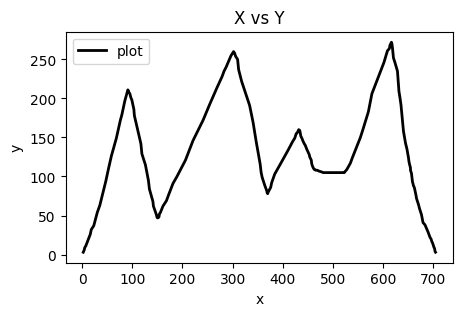

In [30]:
x = np.array(df['x']).reshape((-1,1))
y = np.array(df['y']).reshape((-1,1))

# Plotting 'x' vs 'y'
plt.figure(figsize=(5, 3))
plt.plot(x[:,0], y[:,0], color='black', linewidth=2, label='plot')
plt.xlabel('x')
plt.ylabel('y')
plt.title('X vs Y')
plt.legend()
plt.show()

Epoch 1/500
5/5 [==============================] - 1s 13ms/step - loss: 9868.3545
Epoch 2/500
5/5 [==============================] - 0s 13ms/step - loss: 6801.5859
Epoch 3/500
5/5 [==============================] - 0s 12ms/step - loss: 6680.7158
Epoch 4/500
5/5 [==============================] - 0s 12ms/step - loss: 5667.2603
Epoch 5/500
5/5 [==============================] - 0s 12ms/step - loss: 5057.1978
Epoch 6/500
5/5 [==============================] - 0s 13ms/step - loss: 5118.8711
Epoch 7/500
5/5 [==============================] - 0s 13ms/step - loss: 4459.4043
Epoch 8/500
5/5 [==============================] - 0s 18ms/step - loss: 4325.7812
Epoch 9/500
5/5 [==============================] - 0s 15ms/step - loss: 4699.0405
Epoch 10/500
5/5 [==============================] - 0s 13ms/step - loss: 4295.7983
Epoch 11/500
5/5 [==============================] - 0s 12ms/step - loss: 4066.4719
Epoch 12/500
5/5 [==============================] - 0s 13ms/step - loss: 4414.0435
Epoch 13/500


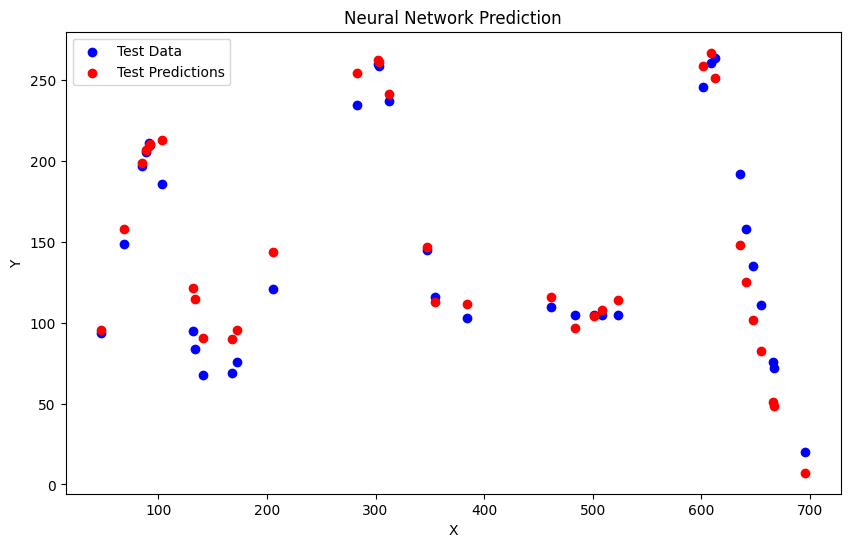

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1024, activation='selu', input_shape=(1,)),
    tf.keras.layers.Dense(units=512, activation='selu'),
    tf.keras.layers.Dense(units=128, activation='selu'),
    tf.keras.layers.Dense(units=64, activation='selu'),
    tf.keras.layers.Dense(units=28, activation='selu'),
    tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(x_train, y_train, epochs=500, batch_size=32, shuffle=False)

# Make predictions
predictions = model.predict(x_test)

# Calculate R-squared score
r_squared = r2_score(y_test, predictions)
r_squared_percentage = r_squared * 100
print("R-squared Score:", r_squared_percentage, "%")

# Calculate MSE for train and test data
train_mse = mean_squared_error(y_train, model.predict(x_train))
test_mse = mean_squared_error(y_test, predictions)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting test data
plt.scatter(x_test, y_test, color='blue', label='Test Data')
plt.scatter(x_test, predictions, color='red', label='Test Predictions')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Neural Network Prediction')
plt.legend()
plt.show()

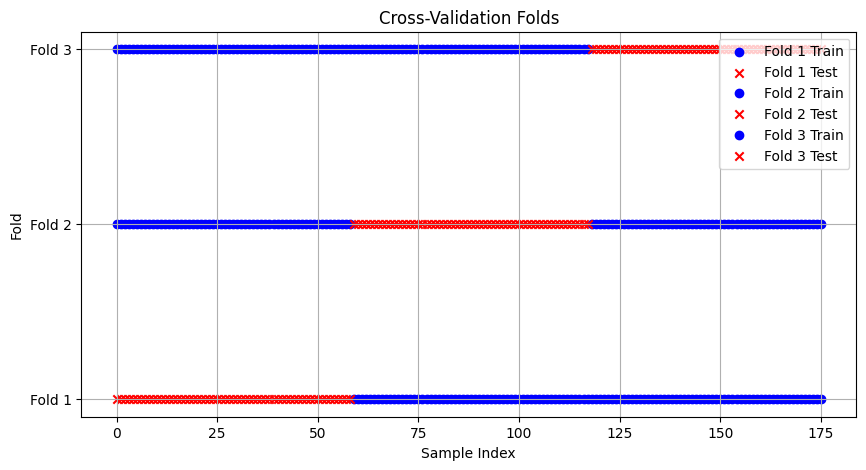

In [43]:
num_samples = 176 
num_folds = 3

# Initialize a figure
plt.figure(figsize=(10, 5))

# Plot the train and test indices for each fold
for fold, (train_idx, test_idx) in enumerate(kf.split(range(num_samples)), 1):
    plt.scatter(train_idx, [fold] * len(train_idx), marker='o', color='blue', label=f'Fold {fold} Train')
    plt.scatter(test_idx, [fold] * len(test_idx), marker='x', color='red', label=f'Fold {fold} Test')

# Set plot labels and title
plt.xlabel('Sample Index')
plt.ylabel('Fold')
plt.title('Cross-Validation Folds')
plt.yticks(range(1, num_folds + 1), [f'Fold {i}' for i in range(1, num_folds + 1)])
plt.legend()
plt.grid(True)

# Show plot
plt.show()